In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from tqdm import tqdm

#Basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,  StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import graphviz

In [6]:
df = pd.read_csv('/Users/rohan/Documents/Programming/Federated Learning/Datasets/NewDataset.csv')

In [7]:
# Splitting the dataset into features and target
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Calculate scale_pos_weight for handling imbalanced dataset
scale_pos_weight = (len(y) - sum(y)) / sum(y)

# Initialize XGBoost with scale_pos_weight parameter
xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')

#Train
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

Accuracy: 0.9753535001745847
Precision: 0.7898323511801595
Recall: 0.9922700819509878
F1 Score: 0.879553270634475
Confusion Matrix:
 [[986360  26677]
 [   781 100255]]


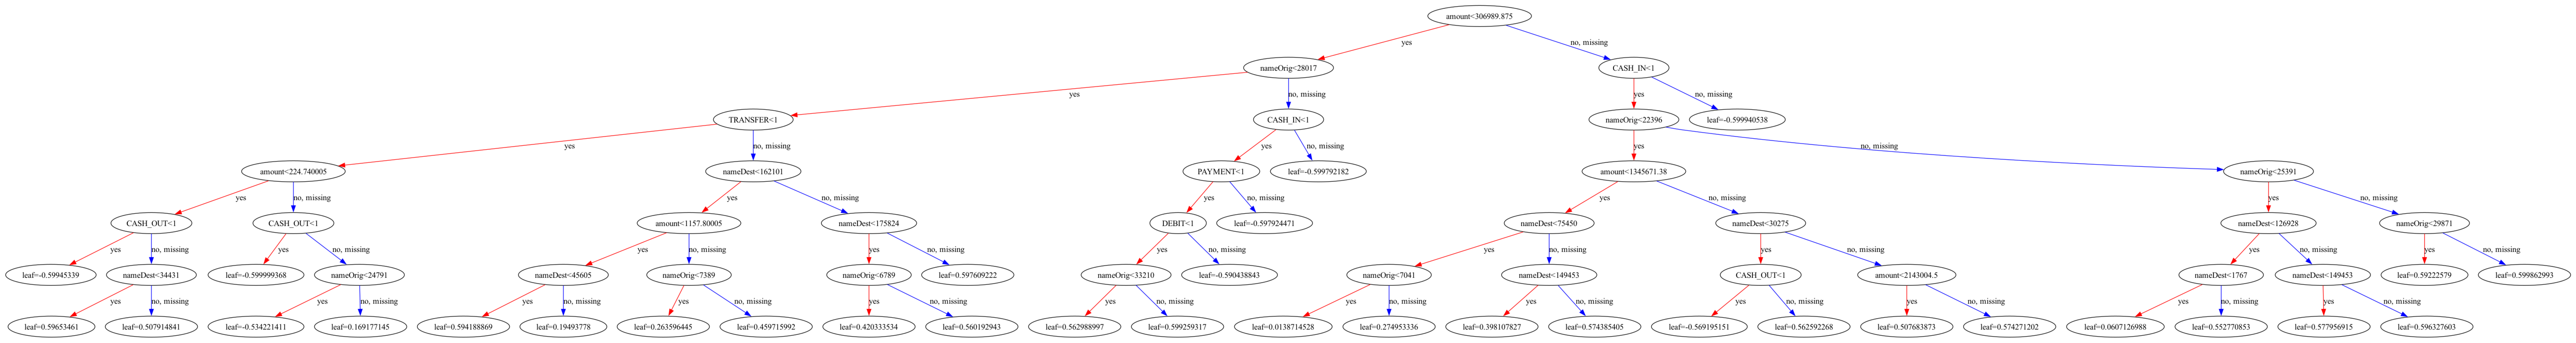

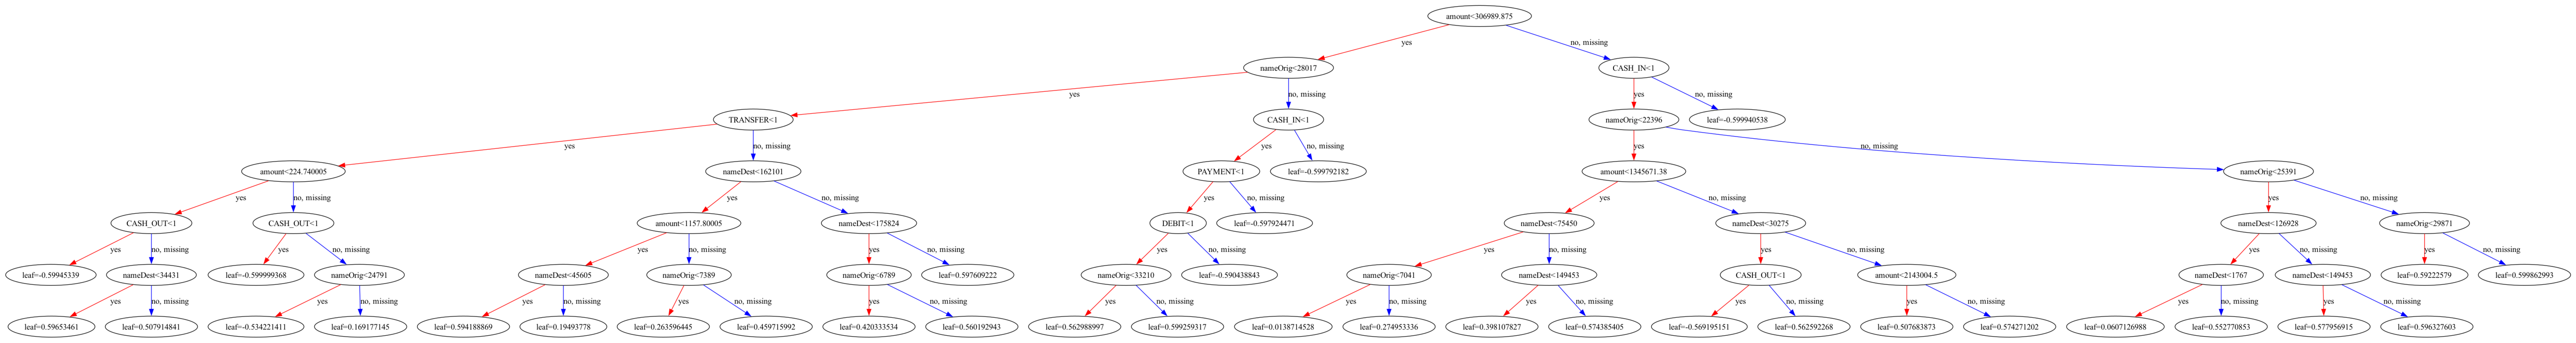

In [12]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the decision tree and saving to a high-resolution file
fig, ax = plt.subplots(figsize=(100, 50), dpi=200)  # Adjust the size and DPI as needed
xgb.plot_tree(xgb_model, num_trees=0, ax=ax)
plt.savefig('xgboost_tree_high_res.png', bbox_inches='tight')

# Display the high-resolution image
from IPython.display import Image
Image(filename='xgboost_tree_high_res.png')